In [1]:
from src.vector_store import ImageVectorPipeline
from src.symantic_search import SemanticSearcher
from src.explain_images import ExplanationGenerator
from utils.image_utils import display_base64_image
from langchain_openai import ChatOpenAI

In [2]:
pipeline = ImageVectorPipeline(persist_dir="chroma_db")
searcher = SemanticSearcher(pipeline.get_vectorstore())

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


100 Queries Benchmark (k=5):
   ➝ Avg latency: 12.32 ms
   ➝ 95th pct latency: 18.65 ms
   ➝ 99th pct latency: 90.72 ms
   ➝ Min: 7.88 ms, Max: 90.73 ms


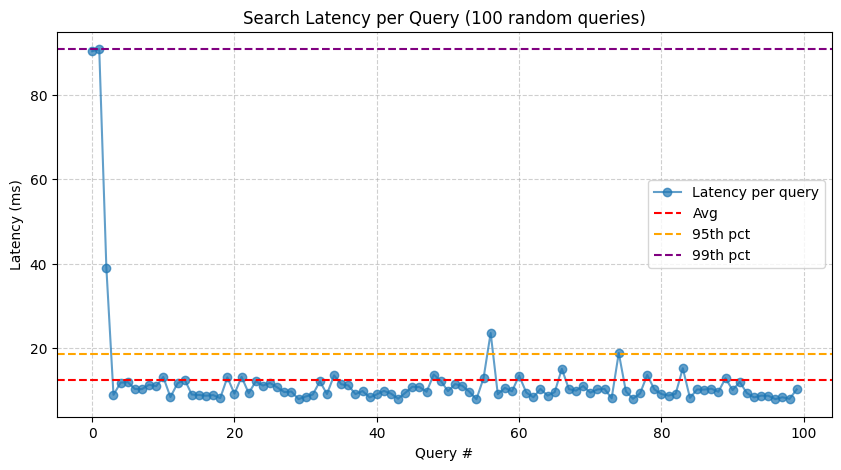

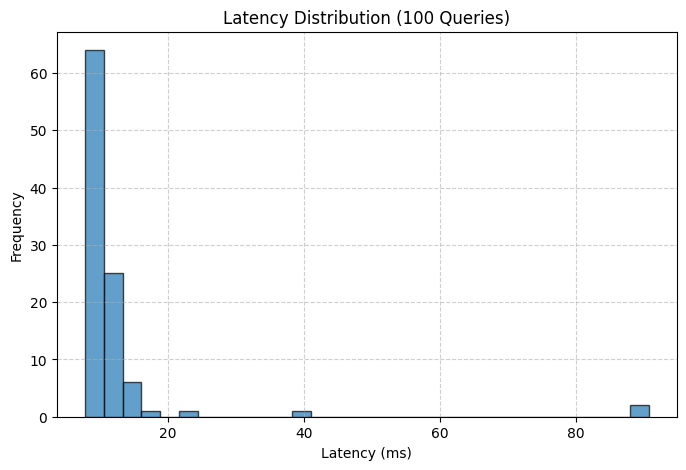

: 

In [ ]:
import random
import time
import statistics
import matplotlib.pyplot as plt

# Example pool of words for synthetic queries
words = ["dog", "cat", "car", "tree", "beach", "city", "mountain", "river", "child", "computer",
         "bird", "flower", "sky", "sun", "moon", "park", "house", "road", "person", "fish"]

def generate_random_query(num_words=3):
    """Generate a random query string of `num_words` length."""
    return " ".join(random.choice(words) for _ in range(num_words))

def benchmark_multiple_queries(searcher, num_queries=100, k=5):
    results = []
    for i in range(num_queries):
        query = generate_random_query()
        start = time.perf_counter()
        _ = searcher.search(query, k=k)
        end = time.perf_counter()
        latency = (end - start) * 1000  # ms
        results.append({"query": query, "latency": latency})
    return results

# ---- Run benchmark ----
results = benchmark_multiple_queries(searcher, num_queries=100, k=5)
latencies = [r["latency"] for r in results]

# ---- Stats ----
avg = statistics.mean(latencies)
p95 = statistics.quantiles(latencies, n=100)[94]
p99 = statistics.quantiles(latencies, n=100)[98]

print(f"100 Queries Benchmark (k=5):")
print(f"   ➝ Avg latency: {avg:.2f} ms")
print(f"   ➝ 95th pct latency: {p95:.2f} ms")
print(f"   ➝ 99th pct latency: {p99:.2f} ms")
print(f"   ➝ Min: {min(latencies):.2f} ms, Max: {max(latencies):.2f} ms")

# ---- Plot line chart ----
plt.figure(figsize=(10, 5))
plt.plot(latencies, marker="o", alpha=0.7, label="Latency per query")
plt.axhline(avg, color="red", linestyle="--", label="Avg")
plt.axhline(p95, color="orange", linestyle="--", label="95th pct")
plt.axhline(p99, color="purple", linestyle="--", label="99th pct")
plt.xlabel("Query #")
plt.ylabel("Latency (ms)")
plt.title("Search Latency per Query (100 random queries)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ---- Histogram ----
plt.figure(figsize=(8, 5))
plt.hist(latencies, bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Latency (ms)")
plt.ylabel("Frequency")
plt.title("Latency Distribution (100 Queries)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
